<a href="https://colab.research.google.com/github/m-shilpa/ethereum-data-analysis/blob/master/Malicious_Address_Prediction/data_analytics_malicious_categories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**column 'label' has values 1 - malicious , 0 - non-malicious**

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/project_data/malicious_prediction_data1.csv')

In [ ]:
df = df[['address','comment','no_of_out_transactions', 'tot_ether_sent','no_of_in_transactions', 'tot_ether_recieved', 'monthly_out_txn',
                'monthly_in_txn', 'active_months', 'eth_balance', 'time_b/w_out_txn','time_b/w_in_txn', 'tot_token_value_recieved',
                'tot_token_value_sent','monthly_ether_sent', 'monthly_ether_recieved','label']]


In [ ]:
non_m = df.loc[df['label'] == 0]
m = df.loc[df['label'] == 1]

In [ ]:
print(df.shape)
print(non_m.shape)
print(m.shape)

(534, 17)
(267, 17)
(267, 17)


In [ ]:
upbit = df[df['comment'].str.contains("Upbit Hacker")]
upbit.shape

(111, 17)

In [ ]:
fake = df[df['comment'].str.contains("Fake")]
fake.shape

(70, 17)

In [ ]:
phish = df[df['comment'].str.contains("Phish")]
phish = phish.append(df[df['comment'].str.contains("phish")])
phish.shape

(42, 17)

In [ ]:
def plot_cate_hist(operation=None,upbit_bool=False,fake_bool=False,phish_bool=False):
  # bins = numpy.linspace(-10, 10, 100)
  attributes  = ['no_of_out_transactions', 'tot_ether_sent','no_of_in_transactions', 'tot_ether_recieved', 'monthly_out_txn',
                'monthly_in_txn', 'active_months', 'eth_balance', 'time_b/w_out_txn','time_b/w_in_txn', 'tot_token_value_recieved',
                'tot_token_value_sent','monthly_ether_sent', 'monthly_ether_recieved']

  
  k =0
  j=0
  if operation == None:   
    for i in range(8):
      j=0
      l=k
      if len(attributes)-l < 2:
        fig,axs = plt.subplots(1,len(attributes)-l,figsize=(15,5))
        
      else:
        fig, axs = plt.subplots(1,2,figsize=(15,5))
      for attr in attributes[l:l+2]:
      
        k+=1
        axs[j].hist(non_m[attr],  alpha=0.5, label='non_malicious')
        if upbit_bool:
          axs[j].hist(upbit[attr],  alpha=0.5, label='upbit')
        if fake_bool:
          axs[j].hist(fake[attr],  alpha=0.5, label='fake')
        if phish_bool:
          axs[j].hist(phish[attr],  alpha=0.5, label='phish')
        axs[j].legend(loc='upper right')
        axs[j].set_title(attr)
        if i==0:
          fig.suptitle('Histogram of the data', fontsize=20)
        j+=1
  else:
    for i in range(8):
      j=0
      l=k
      if len(attributes)-l < 2:
        fig,axs = plt.subplots(1,len(attributes)-l,figsize=(15,5))
        
      else:
        fig, axs = plt.subplots(1,2,figsize=(15,5))
      for attr in attributes[l:l+2]:
        k+=1
        axs[j].hist(operation(non_m[attr]),  alpha=0.5, label='non_malicious')
        if upbit_bool:
          axs[j].hist(operation(upbit[attr]),  alpha=0.5, label='upbit')
        if fake_bool:
          axs[j].hist(operation(fake[attr]),  alpha=0.5, label='fake')
        if phish_bool:
          axs[j].hist(operation(phish[attr]),  alpha=0.5, label='phish')
        axs[j].legend(loc='upper right')
        axs[j].set_title(attr)
        if i==0:
          fig.suptitle(f'Histogram of the {operation}(data)', fontsize=20)
        j+=1
    


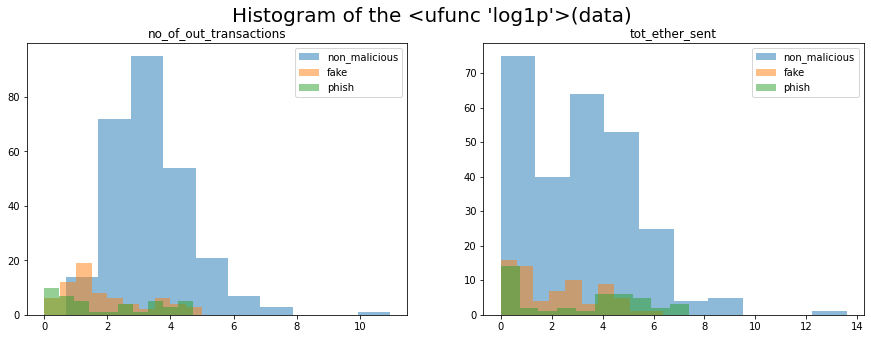

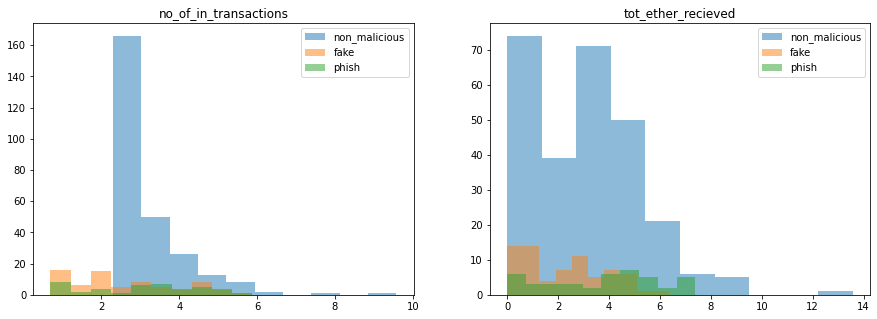

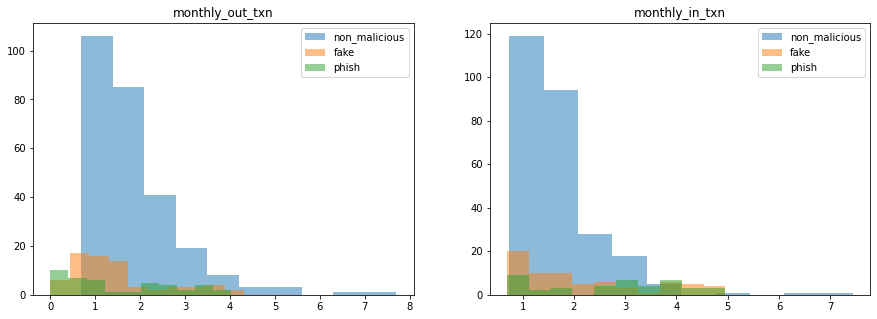

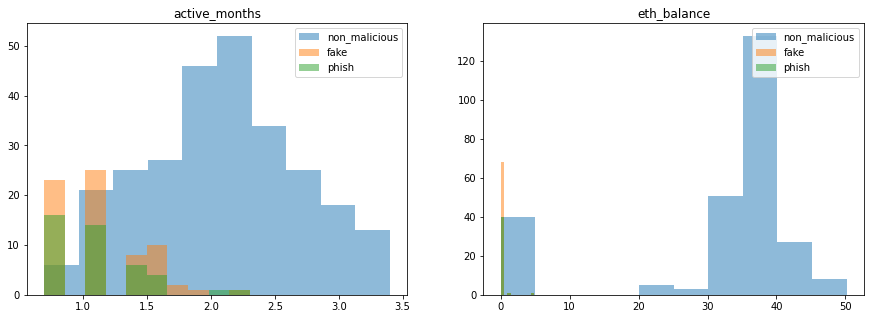

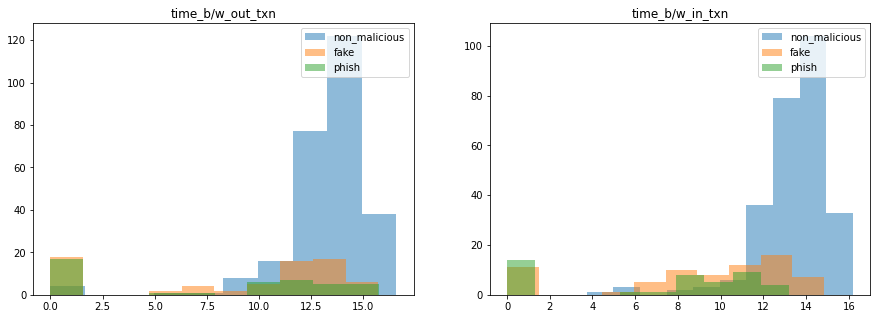

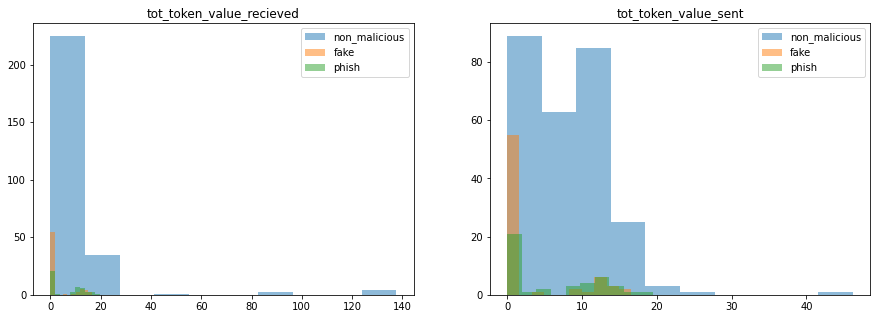

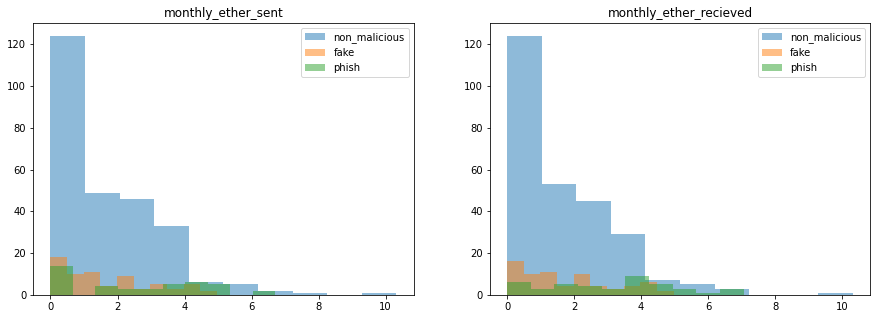

<Figure size 1080x360 with 0 Axes>

In [ ]:
plot_cate_hist(operation=np.log1p,upbit_bool=False,fake_bool=True,phish_bool=True)

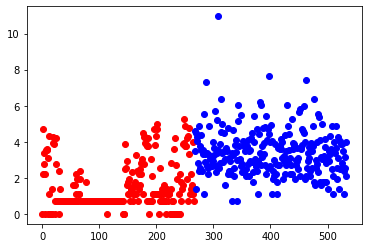

In [ ]:
plt.plot(np.log1p(m['no_of_out_transactions']),'o',color='red',label='malicious')
plt.plot(np.log1p(non_m['no_of_out_transactions']),'o',color='blue',label='non-malicious')

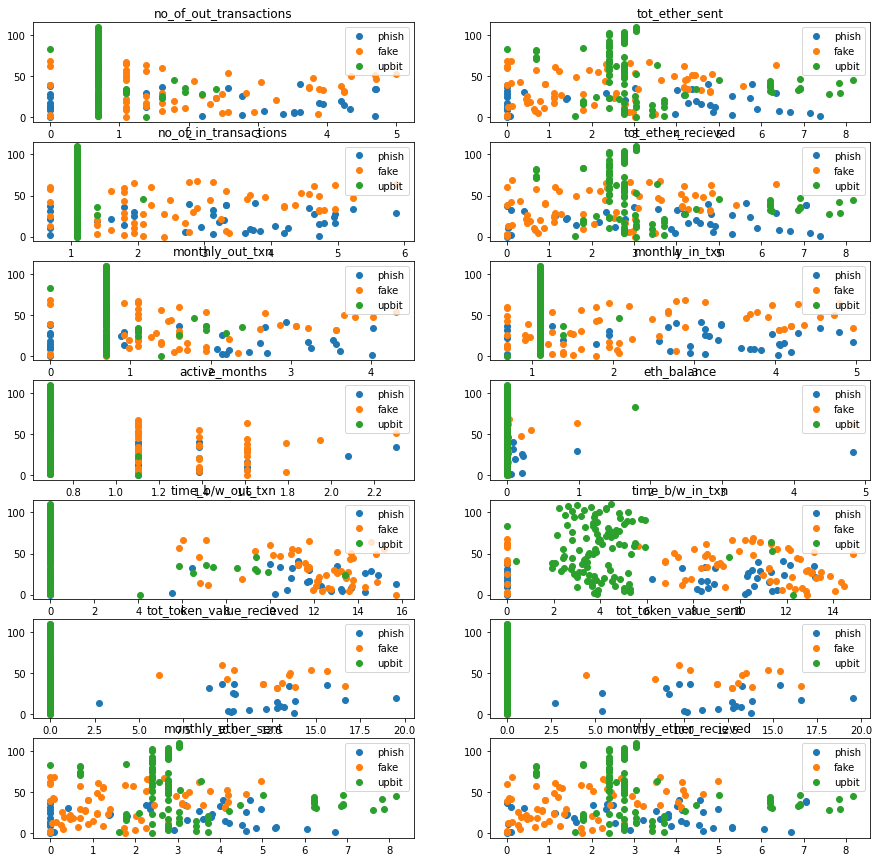

In [ ]:
attributes  = ['no_of_out_transactions', 'tot_ether_sent','no_of_in_transactions', 'tot_ether_recieved', 'monthly_out_txn',
                'monthly_in_txn', 'active_months', 'eth_balance', 'time_b/w_out_txn','time_b/w_in_txn', 'tot_token_value_recieved',
                'tot_token_value_sent','monthly_ether_sent', 'monthly_ether_recieved']
fig, axs = plt.subplots(7,2,figsize=(15,15))
k=0
for i in range(7):
  for j in range(2): 
    # axs[i,j].plot(np.log1p(non_m[attributes[k]]),list(range(len(non_m))),'o',label='non-malicious')
    axs[i,j].plot(np.log1p(phish[attributes[k]]),list(range(len(phish))),'o',label='phish')
    axs[i,j].plot(np.log1p(fake[attributes[k]]),list(range(len(fake))),'o',label='fake')
    axs[i,j].plot(np.log1p(upbit[attributes[k]]),list(range(len(upbit))),'o',label='upbit')
   
    axs[i,j].legend(loc='upper right')
    axs[i,j].set_title(attributes[k])
    k+=1

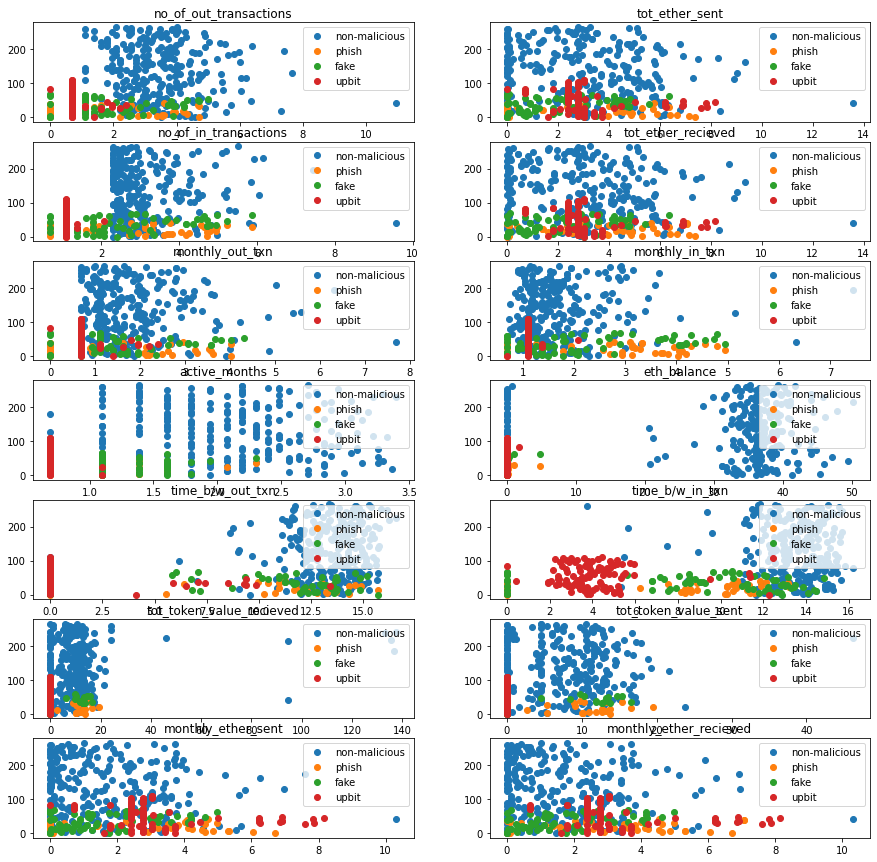

In [ ]:
attributes  = ['no_of_out_transactions', 'tot_ether_sent','no_of_in_transactions', 'tot_ether_recieved', 'monthly_out_txn',
                'monthly_in_txn', 'active_months', 'eth_balance', 'time_b/w_out_txn','time_b/w_in_txn', 'tot_token_value_recieved',
                'tot_token_value_sent','monthly_ether_sent', 'monthly_ether_recieved']
fig, axs = plt.subplots(7,2,figsize=(15,15))
k=0
for i in range(7):
  for j in range(2): 
    axs[i,j].plot(np.log1p(non_m[attributes[k]]),list(range(len(non_m))),'o',label='non-malicious')
    axs[i,j].plot(np.log1p(phish[attributes[k]]),list(range(len(phish))),'o',label='phish')
    axs[i,j].plot(np.log1p(fake[attributes[k]]),list(range(len(fake))),'o',label='fake')
    axs[i,j].plot(np.log1p(upbit[attributes[k]]),list(range(len(upbit))),'o',label='upbit')
   
    axs[i,j].legend(loc='upper right')
    axs[i,j].set_title(attributes[k])
    k+=1

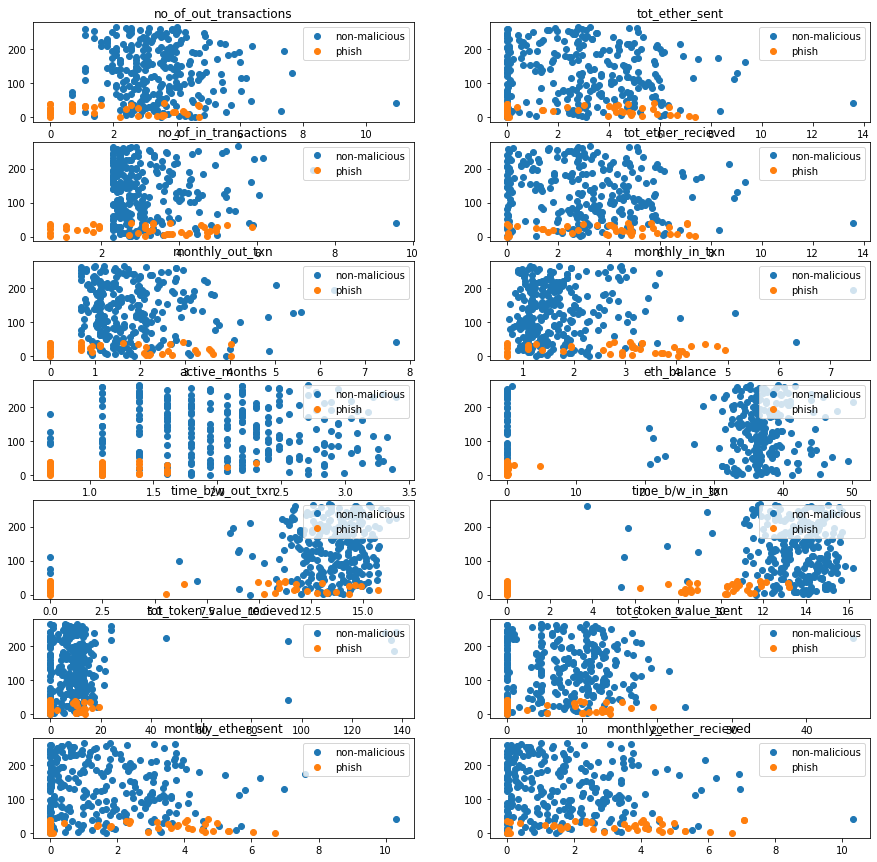

In [ ]:
attributes  = ['no_of_out_transactions', 'tot_ether_sent','no_of_in_transactions', 'tot_ether_recieved', 'monthly_out_txn',
                'monthly_in_txn', 'active_months', 'eth_balance', 'time_b/w_out_txn','time_b/w_in_txn', 'tot_token_value_recieved',
                'tot_token_value_sent','monthly_ether_sent', 'monthly_ether_recieved']
fig, axs = plt.subplots(7,2,figsize=(15,15))
k=0
for i in range(7):
  for j in range(2): 
    axs[i,j].plot(np.log1p(non_m[attributes[k]]),list(range(len(non_m))),'o',label='non-malicious')
    axs[i,j].plot(np.log1p(phish[attributes[k]]),list(range(len(phish))),'o',label='phish')
    # axs[i,j].plot(np.log1p(fake[attributes[k]]),list(range(len(fake))),'o',label='fake')
    # axs[i,j].plot(np.log1p(upbit[attributes[k]]),list(range(len(upbit))),'o',label='upbit')
   
    axs[i,j].legend(loc='upper right')
    axs[i,j].set_title(attributes[k])
    k+=1

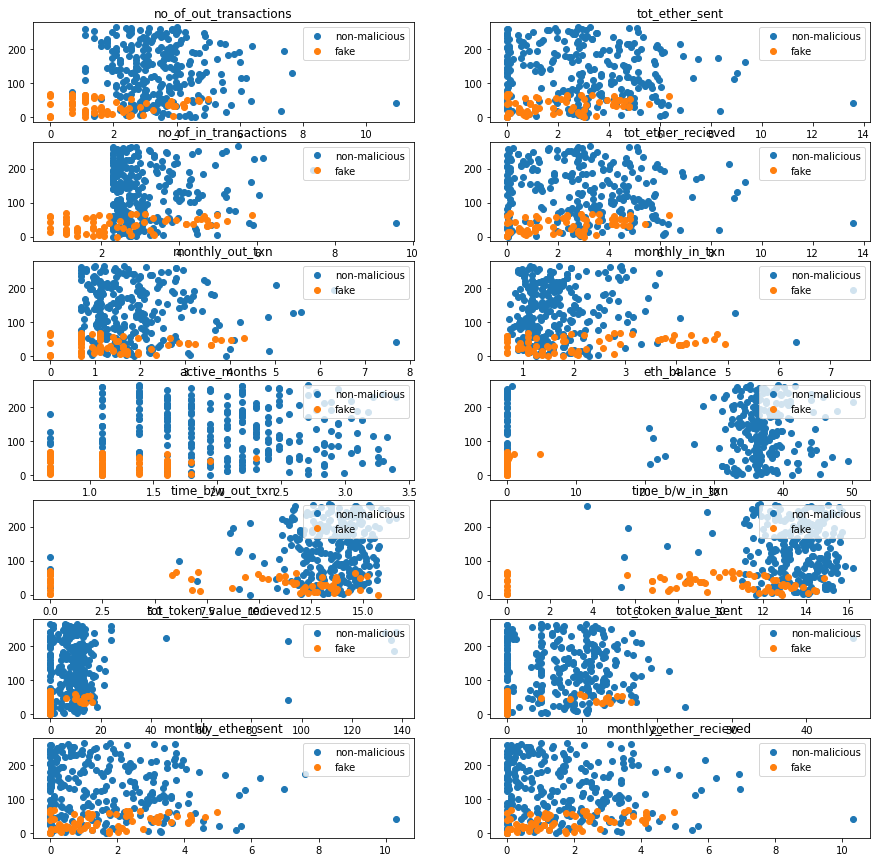

In [ ]:
attributes  = ['no_of_out_transactions', 'tot_ether_sent','no_of_in_transactions', 'tot_ether_recieved', 'monthly_out_txn',
                'monthly_in_txn', 'active_months', 'eth_balance', 'time_b/w_out_txn','time_b/w_in_txn', 'tot_token_value_recieved',
                'tot_token_value_sent','monthly_ether_sent', 'monthly_ether_recieved']
fig, axs = plt.subplots(7,2,figsize=(15,15))
k=0
for i in range(7):
  for j in range(2): 
    axs[i,j].plot(np.log1p(non_m[attributes[k]]),list(range(len(non_m))),'o',label='non-malicious')
    # axs[i,j].plot(np.log1p(phish[attributes[k]]),list(range(len(phish))),'o',label='phish')
    axs[i,j].plot(np.log1p(fake[attributes[k]]),list(range(len(fake))),'o',label='fake')
    # axs[i,j].plot(np.log1p(upbit[attributes[k]]),list(range(len(upbit))),'o',label='upbit')
   
    axs[i,j].legend(loc='upper right')
    axs[i,j].set_title(attributes[k])
    k+=1

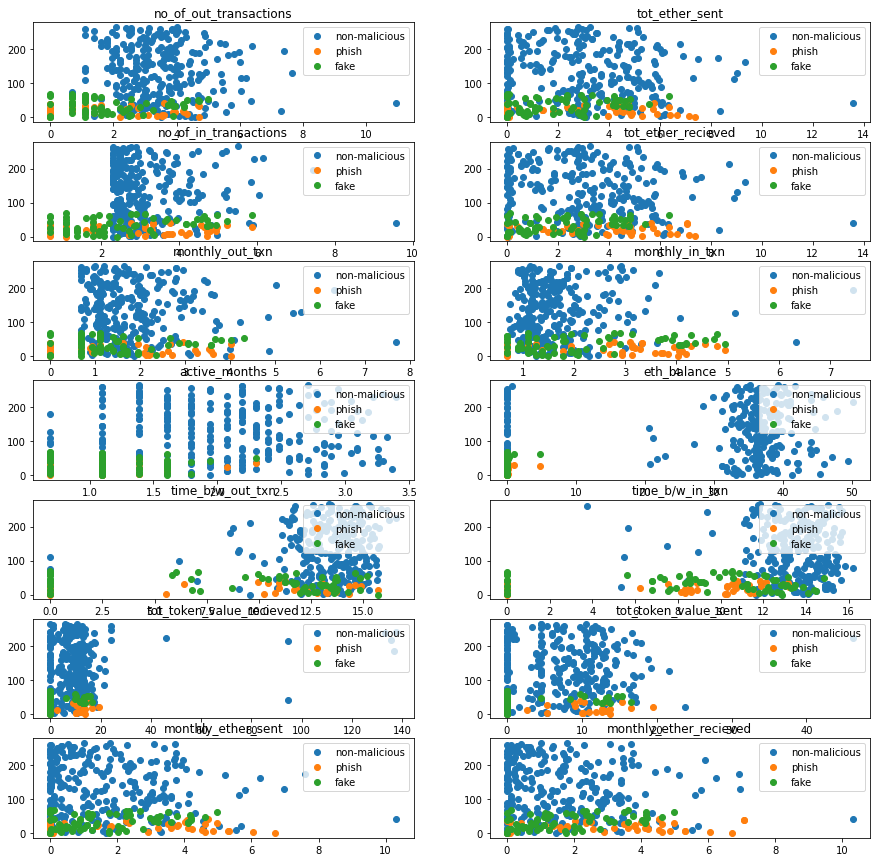

In [ ]:
attributes  = ['no_of_out_transactions', 'tot_ether_sent','no_of_in_transactions', 'tot_ether_recieved', 'monthly_out_txn',
                'monthly_in_txn', 'active_months', 'eth_balance', 'time_b/w_out_txn','time_b/w_in_txn', 'tot_token_value_recieved',
                'tot_token_value_sent','monthly_ether_sent', 'monthly_ether_recieved']
fig, axs = plt.subplots(7,2,figsize=(15,15))
k=0
for i in range(7):
  for j in range(2): 
    axs[i,j].plot(np.log1p(non_m[attributes[k]]),list(range(len(non_m))),'o',label='non-malicious')
    axs[i,j].plot(np.log1p(phish[attributes[k]]),list(range(len(phish))),'o',label='phish')
    axs[i,j].plot(np.log1p(fake[attributes[k]]),list(range(len(fake))),'o',label='fake')
    # axs[i,j].plot(np.log1p(upbit[attributes[k]]),list(range(len(upbit))),'o',label='upbit')
   
    axs[i,j].legend(loc='upper right')
    axs[i,j].set_title(attributes[k])
    k+=1

# Histogram for 2

In [ ]:
def plot_hist(operation=None):
  # bins = numpy.linspace(-10, 10, 100)
  attributes  = ['no_of_out_transactions', 'tot_ether_sent','no_of_in_transactions', 'tot_ether_recieved', 'monthly_out_txn',
                'monthly_in_txn', 'active_months', 'eth_balance', 'time_b/w_out_txn','time_b/w_in_txn', 'tot_token_value_recieved',
                'tot_token_value_sent','monthly_ether_sent', 'monthly_ether_recieved']

  
  k =0
  j=0
  if operation == None:   
    for i in range(4):
      j=0
      l=k
      if len(attributes)-l < 4:
        fig,axs = plt.subplots(1,len(attributes)-l,figsize=(15,5))
        
      else:
        fig, axs = plt.subplots(1,4,figsize=(15,5))
      for attr in attributes[l:l+4]:
      
        k+=1
        axs[j].hist(non_m[attr],  alpha=0.5, label='non_malicious')
        axs[j].hist(m[attr],  alpha=0.5, label='malicious')
        axs[j].legend(loc='upper right')
        axs[j].set_title(attr)
        if i==0:
          fig.suptitle('Histogram of the data', fontsize=20)
        j+=1
  else:
    for i in range(4):
      j=0
      l=k
      if len(attributes)-l < 4:
        fig,axs = plt.subplots(1,len(attributes)-l,figsize=(15,5))
        
      else:
        fig, axs = plt.subplots(1,4,figsize=(15,5))
      for attr in attributes[l:l+4]:
        k+=1
        axs[j].hist(operation(non_m[attr]),  alpha=0.5, label='non_malicious')
        axs[j].hist(operation(m[attr]),  alpha=0.5, label='malicious')
        axs[j].legend(loc='upper right')
        axs[j].set_title(attr)
        if i==0:
          fig.suptitle(f'Histogram of the {operation}(data)', fontsize=20)
        j+=1
    


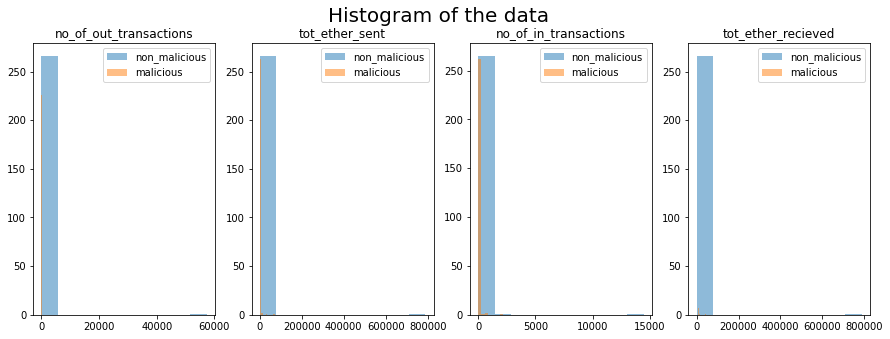

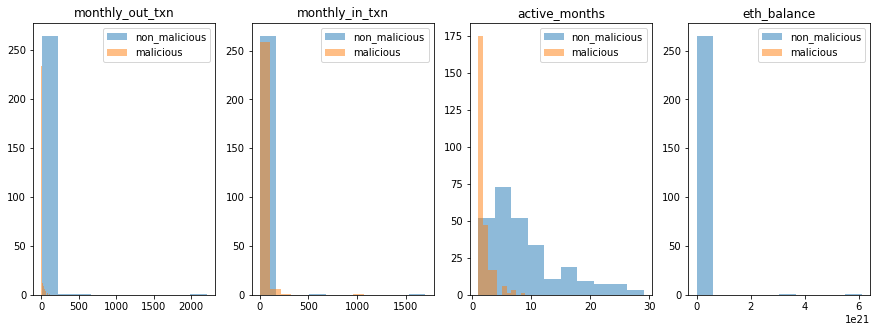

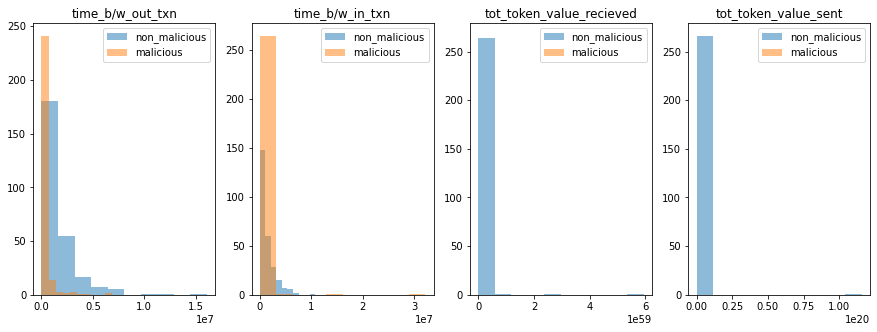

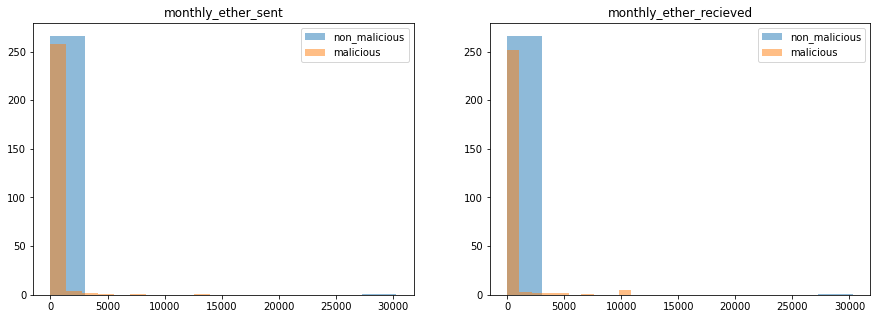

In [ ]:
plot_hist()

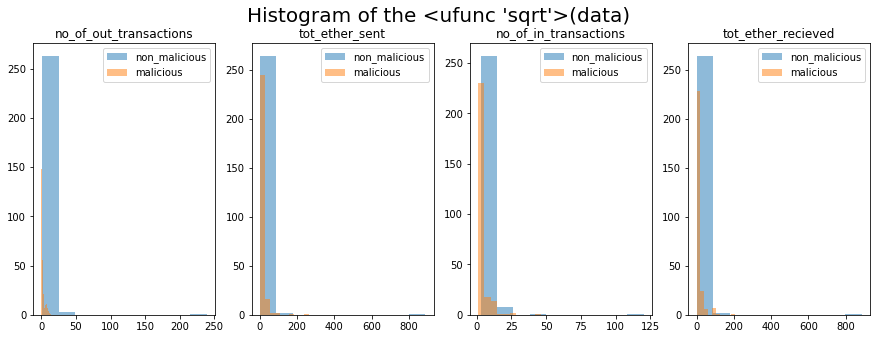

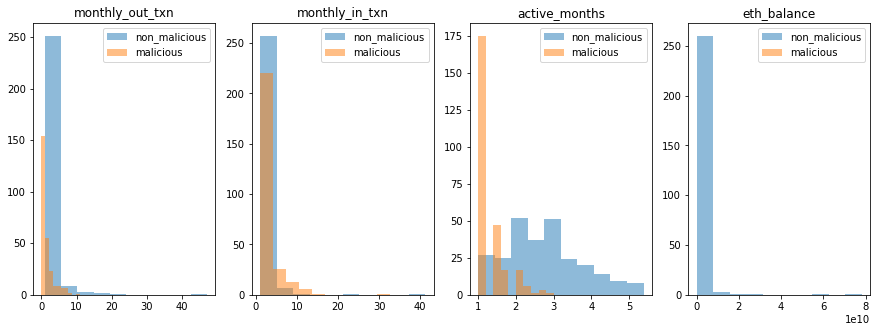

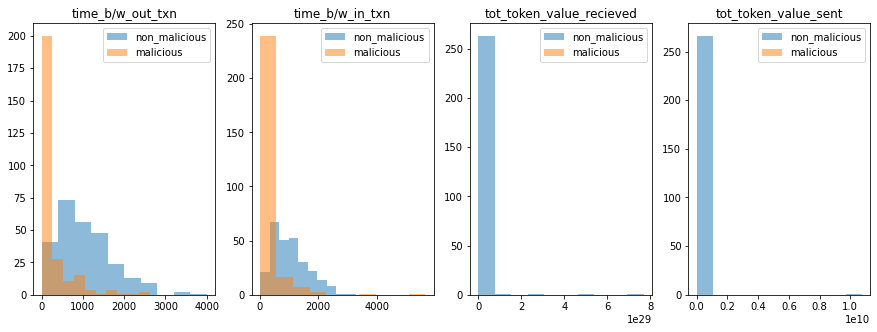

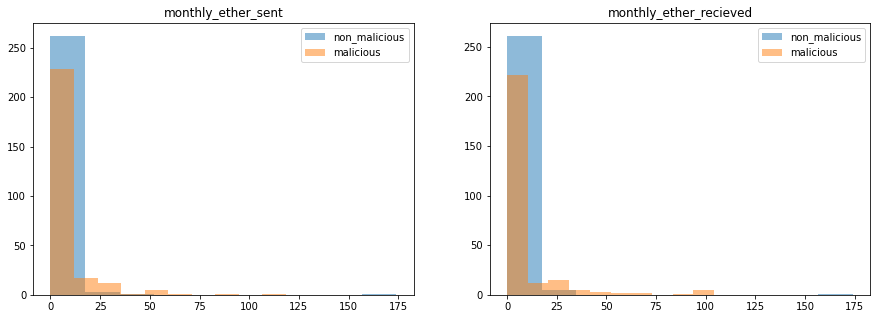

In [ ]:
plot_hist(operation=np.sqrt)

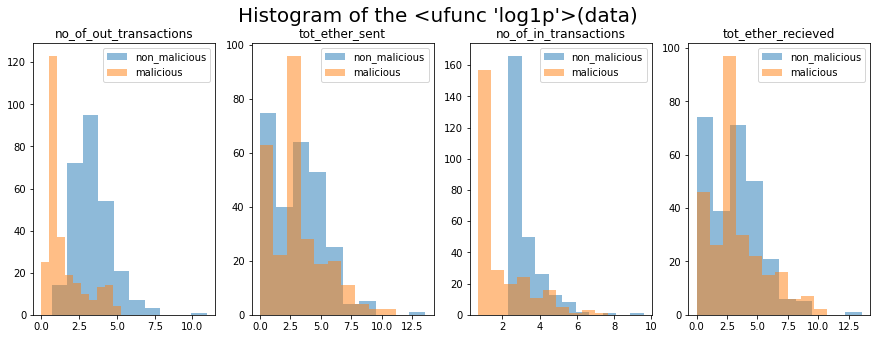

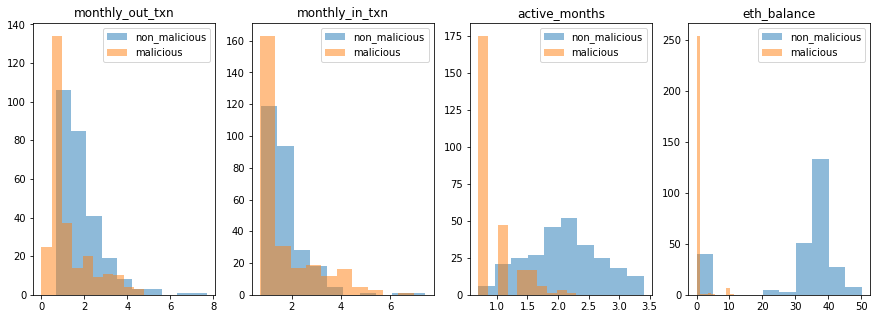

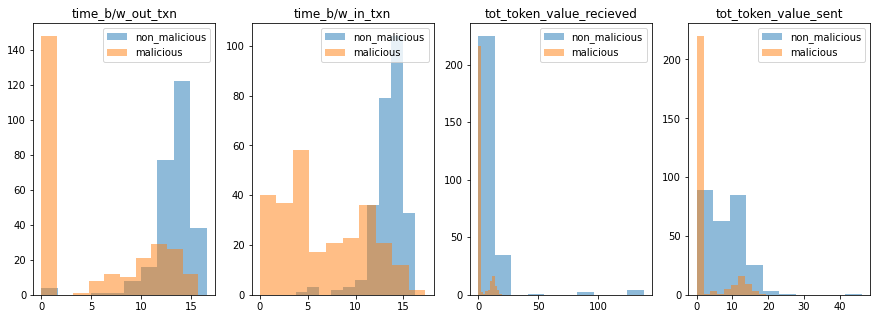

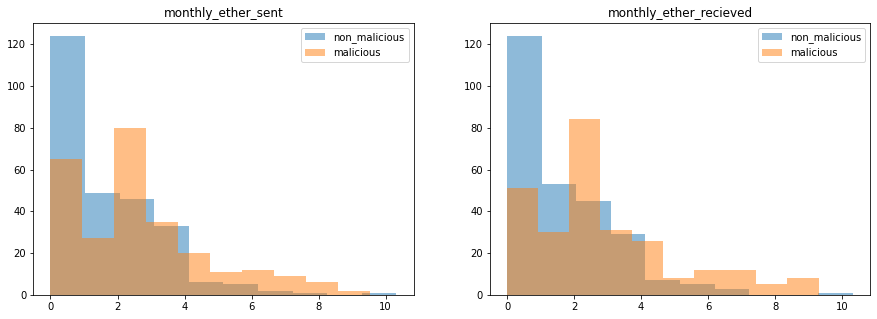

In [ ]:
plot_hist(operation=np.log1p)

In [ ]:
data = df.loc[:,'no_of_out_transactions':].copy()

# Density plot for 2

Feature density plot for the labels in the data


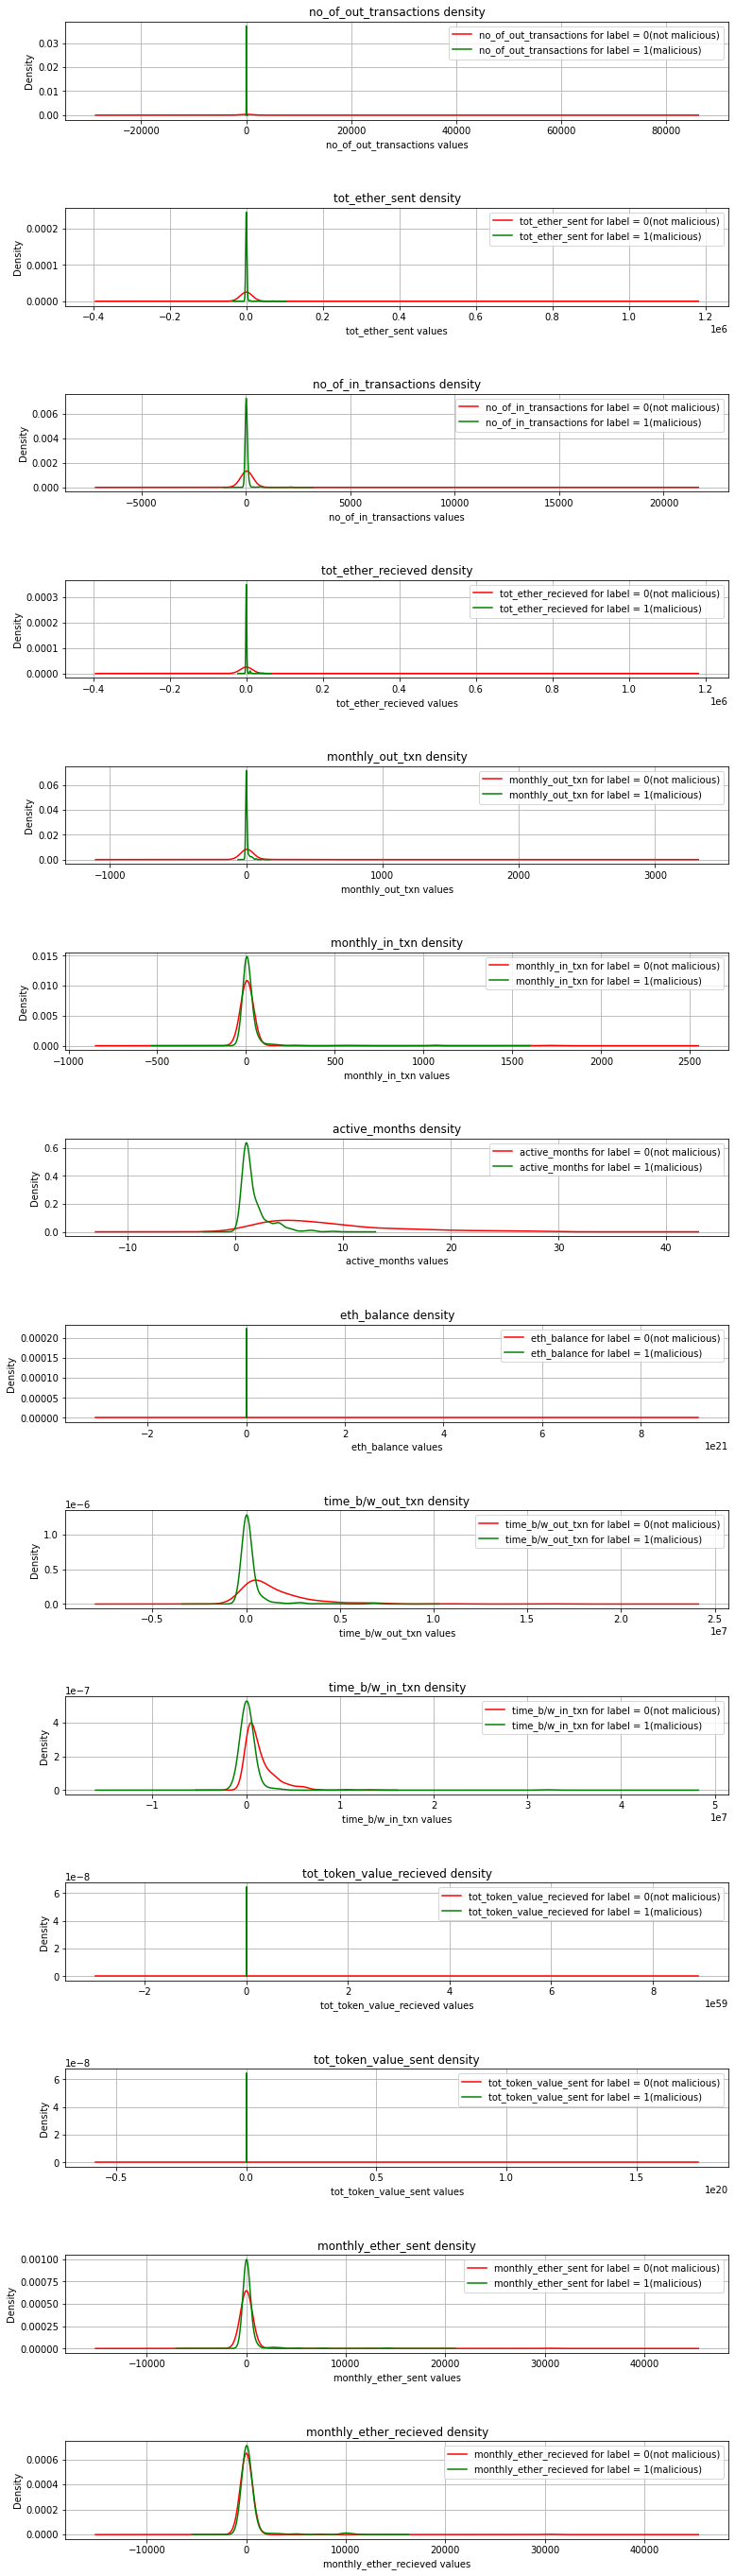

In [ ]:
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt


def plot_densities(data,names):
    '''
    Plot features densities depending on the label values
    '''
    # change fig size to fit all subplots beautifully 
    rcParams['figure.figsize'] = 15, 20

    # separate data based on label values 
    label_0 = data[data['label'] == 0]
    label_1 = data[data['label'] == 1]

    # init figure
    fig, axs = plt.subplots(14, 1)
    
    plt.subplots_adjust(left = 0.25, right = 0.9, bottom = 0.1, top = 1.95,
                        wspace = 0.2, hspace = 0.9)

    print('Feature density plot for the labels in the data')
    # plot densities for labels
    for column_name in names[:-1]: 
        ax = axs[names.index(column_name)]
        #plt.subplot(4, 2, names.index(column_name) + 1)
        label_0[column_name].plot(kind='density', ax=ax, subplots=True, 
                                    sharex=False, color="red", legend=True,
                                    label=column_name + ' for label = 0(not malicious)')
        label_1[column_name].plot(kind='density', ax=ax, subplots=True, 
                                     sharex=False, color="green", legend=True,
                                     label=column_name + ' for label = 1(malicious)')
        ax.set_xlabel(column_name + ' values')
        ax.set_title(column_name + ' density')
        ax.grid('on')
        
    plt.show()
    fig.savefig('densities.png')

# load your data 
names = list(data.columns)
# plot correlation & densities
plot_densities(data,names)

Feature density plot for the labels in the log(data)


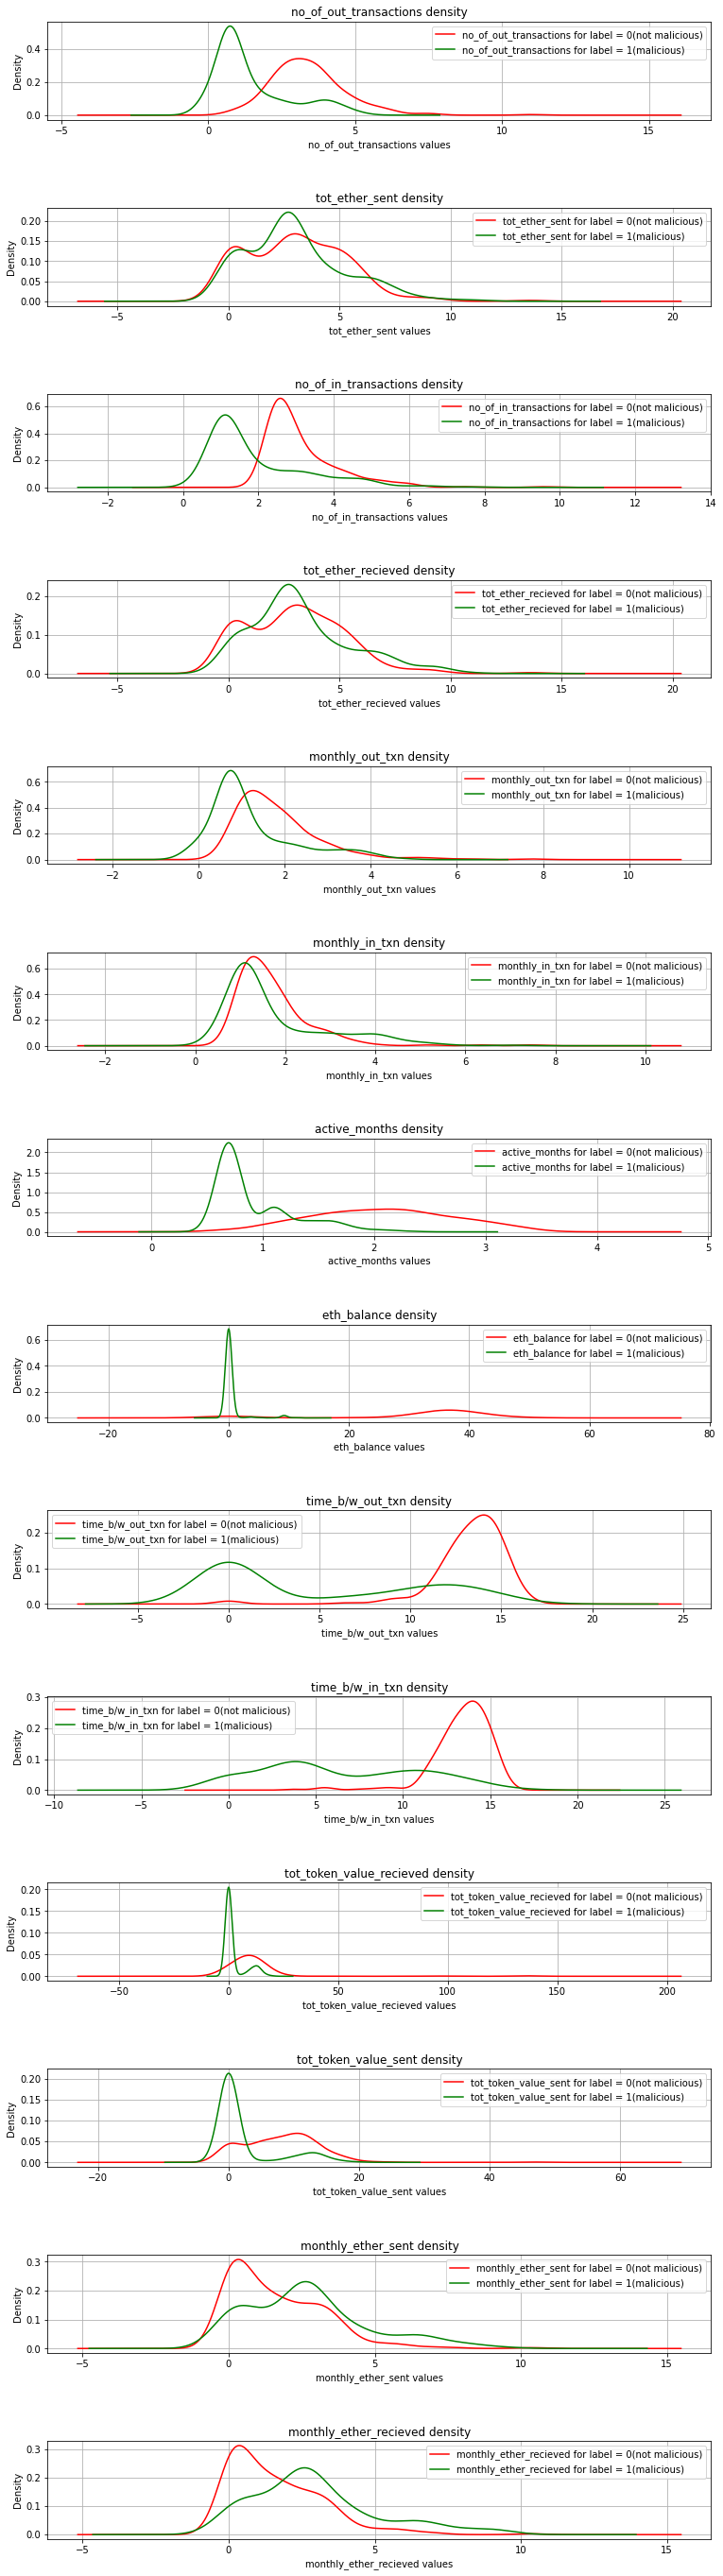

In [ ]:
def plot_densities(data,names):
    '''
    Plot features densities depending on the label values
    '''
    # change fig size to fit all subplots beautifully 
    rcParams['figure.figsize'] = 15, 20

    # separate data based on label values 
    label_0 = data[data['label'] == 0]
    label_1 = data[data['label'] == 1]

    # init figure
    fig, axs = plt.subplots(14, 1)
    
    plt.subplots_adjust(left = 0.25, right = 0.9, bottom = 0.1, top = 1.95,
                        wspace = 0.2, hspace = 0.9)
  
    print('Feature density plot for the labels in the log(data)')
    # plot densities for labels
    for column_name in names[:-1]: 
        ax = axs[names.index(column_name)]
        #plt.subplot(4, 2, names.index(column_name) + 1)
        np.log1p(label_0[column_name]).plot(kind='density', ax=ax, subplots=True, 
                                    sharex=False, color="red", legend=True,
                                    label=column_name + ' for label = 0(not malicious)')
        np.log1p(label_1[column_name]).plot(kind='density', ax=ax, subplots=True, 
                                     sharex=False, color="green", legend=True,
                                     label=column_name + ' for label = 1(malicious)')
        ax.set_xlabel(column_name + ' values')
        ax.set_title(column_name + ' density')
        ax.grid('on')
     
    plt.show()
    fig.savefig('densities.png')

names = list(data.columns)
# plot correlation & densities
plot_densities(data,names)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


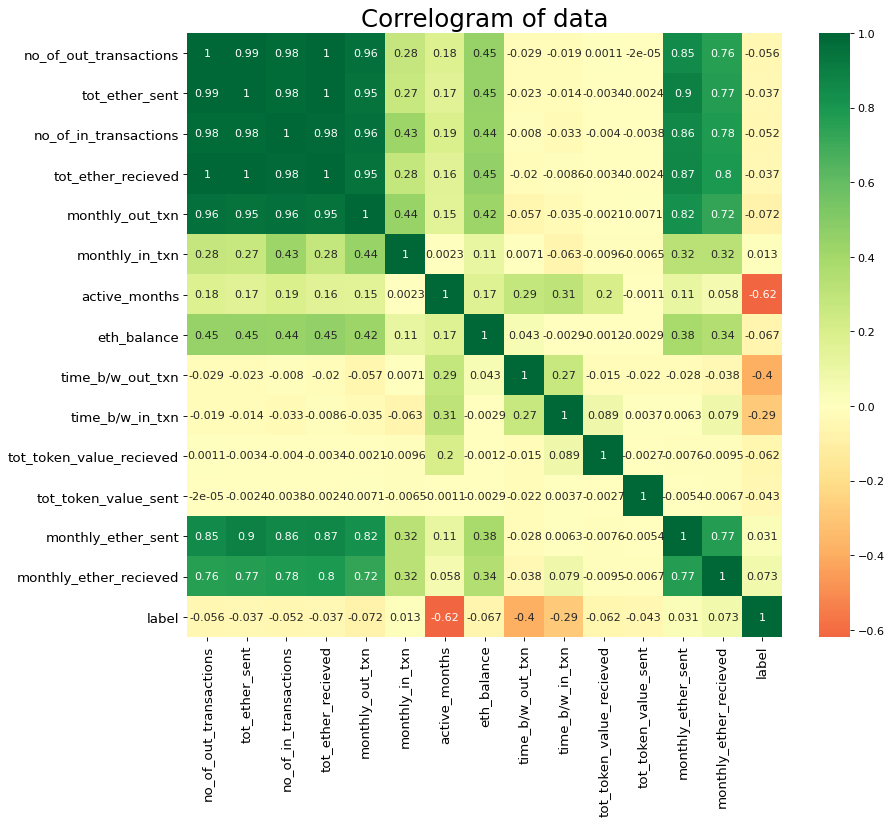

In [ ]:
import seaborn as sns
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of data', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()